In [37]:
!pip install keras-tuner

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [39]:
print(tf.__version__)

2.2.0


In [40]:
fashion_mnist=keras.datasets.fashion_mnist

In [41]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [42]:
train_images=train_images/255.0
test_images=test_images/255.0

In [43]:
train_images[0].shape

(28, 28)

In [44]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [45]:
train_images[0].shape

(28, 28, 1)

In [46]:
def build_model(hp):
  model=keras.Sequential([
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv_1_kernal',values=[3,5]),
                              activation='relu',
                              input_shape=(28,28,1)
                          ),
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_2_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv_2_kernal',values=[3,5]),
                              activation='relu',
                              input_shape=(28,28,1)
                          ),
                          keras.layers.Flatten(),
                          keras.layers.Dense(
                              units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
                              activation='relu',
                          ),
                          keras.layers.Dense(10,activation='softmax')
                          ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_tate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

  

In [47]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [48]:
tuner_search=RandomSearch(build_model,max_trials=5,objective='val_accuracy',directory='output',project_name='Mnist_Fashion')

INFO:tensorflow:Reloading Oracle from existing project output/Mnist_Fashion/oracle.json
INFO:tensorflow:Reloading Tuner from output/Mnist_Fashion/tuner0.json


In [49]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.15)

INFO:tensorflow:Oracle triggered exit


In [50]:
models=tuner_search.get_best_models(num_models=1)[0]

In [51]:
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 80)        800       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        23072     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                1769568   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 1,794,410
Trainable params: 1,794,410
Non-trainable params: 0
_________________________________________________________________


In [52]:
models.fit(train_images,train_labels,epochs=10,initial_epoch=3,validation_split=0.15)

Epoch 4/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.1333 - accuracy: 0.9513 - val_loss: 0.2544 - val_accuracy: 0.9134
Epoch 5/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0908 - accuracy: 0.9668 - val_loss: 0.3026 - val_accuracy: 0.9151
Epoch 6/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0624 - accuracy: 0.9768 - val_loss: 0.3346 - val_accuracy: 0.9158
Epoch 7/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.4044 - val_accuracy: 0.9052
Epoch 8/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9872 - val_loss: 0.4585 - val_accuracy: 0.9060
Epoch 9/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0268 - accuracy: 0.9902 - val_loss: 0.5121 - val_accuracy: 0.9090
Epoch 10/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9912 - val_loss: 0.5338 - val_accuracy

In [53]:
evaluation=models.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5593 - accuracy: 0.9104


In [54]:
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.910


In [55]:
predicted_classes=models.predict_classes(test_images)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [56]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

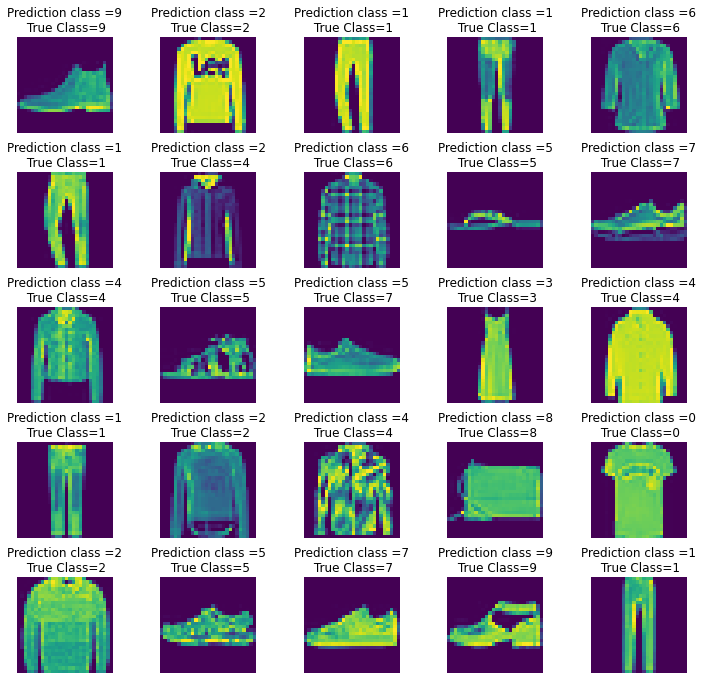

In [57]:
import matplotlib.pyplot as plt
L=5
W=5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(test_images[i].reshape(28,28))
  axes[i].set_title("Prediction class ={}\n True Class={}".format(predicted_classes[i],test_labels[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)  